### Mohammadreza Osouli - 610395077 - Phase 5.2

In [1]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### Convolution on 2d matrix function

In [2]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image


#### Gabor kernel function:

In [3]:
def get_gabor_kernel(landa, theta, sigma, gamma, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError('kernel_size should be an odd number like 3, 5 and ...')
    result = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i - kernel_size // 2, j - kernel_size // 2
            X = x * math.cos(theta) + y * math.sin(theta)
            Y = - x * math.sin(theta) + y * math.cos(theta)
            result[i][j] = math.exp(-(X*X + gamma * gamma * Y * Y) / (2 * sigma * sigma)) * \
                math.cos(2 * math.pi * X / landa)
    return result  # - np.mean(result)


#### Main task:
In this part, I implemented Gabor filters in 4 directions and 8 kernel sizes (both can be changed in the below block of code) and convolve them on a grayscale photo as previous part.

As showed in result you can easily detect which part of photo is effected more by which kernel.

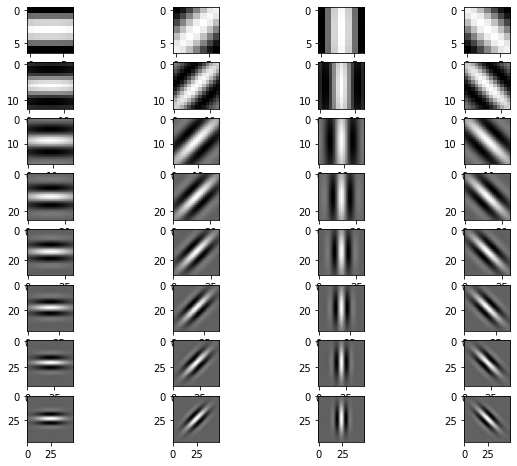

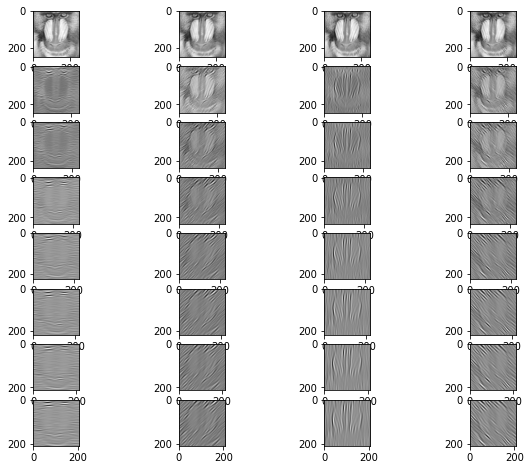

In [4]:
gray = np.asarray(Image.open("data/gorill.png").convert('L'))
kernels = [get_gabor_kernel(10, math.pi * theta / 4, 5, 0.5, size)
                 for size in [7, 13, 19, 25, 31, 37, 43, 49]
                 for theta in range(4)]
filtered_images = [convolution2d(gray, kernel) for kernel in kernels]

fig, axes = plt.subplots(len(kernels) // 4, 4, figsize=(10, 8))
fig1, axes1 = plt.subplots(len(kernels) // 4, 4, figsize=(10, 8))
for i in range(0, len(kernels), 4):
    row = (i // 4)
    for j in range(4):
        axes[row][j].imshow(kernels[i + j], "gray")
        axes1[row][j].imshow(filtered_images[i + j], "gray")
plt.show()
